In [30]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [18]:
column_mapping = {
    'Stn Id': 'station_id',
    'Stn Name': 'station_name',
    'CIMIS Region': 'region',
    'Date': 'date',
    'Jul': 'jul',
    'ETo (in)': 'eto_in',
    'Precip (in)': 'precip',
    'Sol Rad (Ly/day)': 'sol_rad',
    'Avg Vap Pres (mBars)': 'avg_vap_pressure',
    'Max Air Temp (F)': 'max_air_temp',
    'Min Air Temp (F)': 'min_air_temp',
    'Min Air Temp (F)': 'min_air_temp',
    'Avg Air Temp (F)': 'avg_air_temp',
    'Max Rel Hum (%)': 'max_rel_humidity',
    'Min Rel Hum (%)': 'min_rel_humidity',
    'Avg Rel Hum (%)': 'avg_rel_humidity',
    'Dew Point (F)': 'dew_point',
    'Avg Wind Speed (mph)': 'avg_wind_speed',
    'Wind Run (miles)': 'wind_run_miles',
    'Avg Soil Temp (F)': 'avg_soil_temp',

}

In [37]:
wx = pd.read_csv("cimis_11-20-8-25.csv")
wx = wx.rename(columns=column_mapping)
clean_avg_temp = wx["avg_air_temp"].interpolate() #handling null values due to QA concerns

In [4]:
wx.head()

,station_id,station_name,region,date,jul,eto_in,qc,precip,qc.1,sol_rad,...,avg_rel_humidity,qc.9,dew_point,qc.10,avg_wind_speed,qc.11,wind_run_miles,qc.12,avg_soil_temp,qc.13
0,264,Sierra Valley Center,Eastern Sierra Basin & Range,11/7/2020,312,0.03,,0.00,,120.0,...,81.0,,27.0,,6.5,,156.8,,44.5,
1,264,Sierra Valley Center,Eastern Sierra Basin & Range,11/8/2020,313,0.04,,0.06,,217.0,...,81.0,Y,20.0,Y,4.2,,102.0,,42.7,
2,264,Sierra Valley Center,Eastern Sierra Basin & Range,11/9/2020,314,0.04,,0.00,,269.0,...,80.0,Y,14.3,Y,3.6,,86.7,,38.0,Y
3,264,Sierra Valley Center,Eastern Sierra Basin & Range,11/10/2020,315,0.07,,0.00,,289.0,...,65.0,,19.7,,3.9,,92.7,,38.1,Y
4,264,Sierra Valley Center,Eastern Sierra Basin & Range,11/11/2020,316,0.06,,0.00,,256.0,...,66.0,,19.2,,3.2,,77.1,,38.2,Y


In [14]:
wx["date"] = pd.to_datetime(wx["date"], format = "mixed")
wx.tail()

,station_id,station_name,region,date,jul,eto_in,qc,precip,qc.1,sol_rad,...,avg_rel_humidity,qc.9,dew_point,qc.10,avg_wind_speed,qc.11,wind_run_miles,qc.12,avg_soil_temp,qc.13
1729,264,Sierra Valley Center,Eastern Sierra Basin & Range,2025-08-03,215,0.27,R,0.0,,693.0,...,39.0,Y,35.6,Y,5.4,,130.5,,64.9,
1730,264,Sierra Valley Center,Eastern Sierra Basin & Range,2025-08-04,216,0.26,R,0.0,,685.0,...,43.0,Y,36.8,Y,5.1,,122.9,,64.7,
1731,264,Sierra Valley Center,Eastern Sierra Basin & Range,2025-08-05,217,0.25,R,0.0,,682.0,...,42.0,Y,37.2,Y,4.4,,106.4,,64.5,
1732,264,Sierra Valley Center,Eastern Sierra Basin & Range,2025-08-06,218,0.23,,0.0,,618.0,...,44.0,,39.1,,4.3,,102.4,,64.4,
1733,264,Sierra Valley Center,Eastern Sierra Basin & Range,2025-08-07,219,0.25,,0.0,,660.0,...,47.0,,42.2,,4.5,,107.5,,64.8,


In [15]:
wx.index = wx['date']
del wx['date']
wx.head()

,station_id,station_name,region,jul,eto_in,qc,precip,qc.1,sol_rad,qc.2,...,avg_rel_humidity,qc.9,dew_point,qc.10,avg_wind_speed,qc.11,wind_run_miles,qc.12,avg_soil_temp,qc.13
date,,,,,,,,,,,,,,,,,,,,,
2020-11-07,264,Sierra Valley Center,Eastern Sierra Basin & Range,312,0.03,,0.00,,120.0,,...,81.0,,27.0,,6.5,,156.8,,44.5,
2020-11-08,264,Sierra Valley Center,Eastern Sierra Basin & Range,313,0.04,,0.06,,217.0,,...,81.0,Y,20.0,Y,4.2,,102.0,,42.7,
2020-11-09,264,Sierra Valley Center,Eastern Sierra Basin & Range,314,0.04,,0.00,,269.0,,...,80.0,Y,14.3,Y,3.6,,86.7,,38.0,Y
2020-11-10,264,Sierra Valley Center,Eastern Sierra Basin & Range,315,0.07,,0.00,,289.0,,...,65.0,,19.7,,3.9,,92.7,,38.1,Y
2020-11-11,264,Sierra Valley Center,Eastern Sierra Basin & Range,316,0.06,,0.00,,256.0,,...,66.0,,19.2,,3.2,,77.1,,38.2,Y


Text(0.5, 0, 'Date')

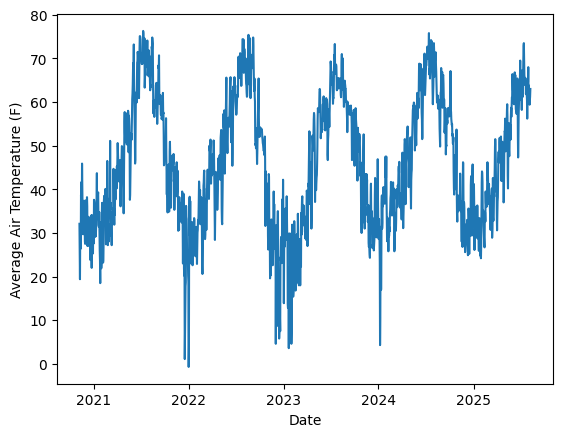

In [23]:
sb.lineplot(wx["avg_air_temp"])
plt.ylabel("Average Air Temperature (F)")
plt.xlabel("Date")

### Testing for Stationarity

In [38]:
rolling_mean = clean_avg_temp.rolling(6).mean()
rolling_std = clean_avg_temp.rolling(6).std()

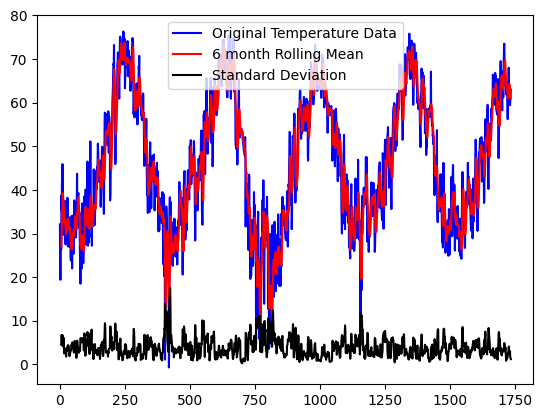

In [39]:
plt.plot(clean_avg_temp, color = "blue", label = "Original Temperature Data")
plt.plot(rolling_mean, color = "red", label = "6 month Rolling Mean")
plt.plot(rolling_std, color = "black", label = "Standard Deviation")
plt.legend(loc = "best")

In [36]:
# Checking for nulls/missing/inf in the avg_air_temp
print(wx["avg_air_temp"].isnull().sum())
print(wx["avg_air_temp"].isna().sum())
print(np.isinf(wx["avg_air_temp"]).sum())

print(wx[wx["avg_air_temp"].isnull()])


5
5
0
            station_id          station_name                        region  \
date                                                                         
2023-03-02         264  Sierra Valley Center  Eastern Sierra Basin & Range   
2024-08-24         264  Sierra Valley Center  Eastern Sierra Basin & Range   
2025-06-03         264  Sierra Valley Center  Eastern Sierra Basin & Range   
2025-07-04         264  Sierra Valley Center  Eastern Sierra Basin & Range   
2025-07-14         264  Sierra Valley Center  Eastern Sierra Basin & Range   

            jul  eto_in qc  precip qc.1  sol_rad qc.2  ...  avg_rel_humidity  \
date                                                   ...                     
2023-03-02   61    0.06  R    0.00    H    436.0       ...               NaN   
2024-08-24  237    0.24  H    0.24         222.0       ...               NaN   
2025-06-03  154    0.23  A     NaN    M      NaN    M  ...               NaN   
2025-07-04  185    0.28  A     NaN    M      Na

In [40]:

adft = adfuller(clean_avg_temp, autolag = "AIC")

In [42]:
adft_output = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3],adft[4]['1%'],adft[4]['5%'],adft[4]['10%']], "Metric":["Test Statistics","p-value","No of lags","Number of observations","Critical value (1%)","Critical Value (5%)","Critical Value (10%)"]})

In [43]:
print(adft_output)

        Values                  Metric
0    -2.327950         Test Statistics
1     0.163112                 p-value
2    13.000000              No of lags
3  1720.000000  Number of observations
4    -3.434158     Critical value (1%)
5    -2.863222     Critical Value (5%)
6    -2.567665    Critical Value (10%)
